---
---
### Perkenalan

Nama    : I Made Dhanan Pradipta <br>


Objective   : Buatlah model machine learning untuk mengklasifikasikan<br>        kemungkinan orang terkena serangan jantung. Bandingkan antara model Decision Tree dan Random Forest. <br>
Analisa dua buah model ini dan tentukan model yang terbaik untuk data ini

---
---
### Import Library

In [425]:
#mport library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

---
---
### Data Loading

In [426]:
#load dataset
df = pd.read_csv('heart.csv')

In [427]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [428]:
heart_df = df.copy()

In [429]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [430]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [431]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [432]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [433]:
heart_df.shape

(303, 14)

#### Note :
1. terdapat 303 baris dan 14 kolom pada dataset 
2. kolom target yang akan dibuat model klasifikasinya adalah kolom _target_ yang dimana menjelaskan chance dari terjadinya serangan jantung pada pasien
3. tidak terdapat missing value pada dataset
4. dari deskripsi dataset, sulit menentukan apakah terdapat outlier apa tidak, karena tidak terdapat nilai yang aneh

---
---
### Exploratory Data Analysis (EDA)

#### Step by Step
1. Target analysis
2. Variabel analysis
3. Cek missing value
4. Cek Outlier

---
1. Target analysis

In [434]:
#ubah nama pada target, sehingga lebih menjelaskan value dari kolom
heart_df = heart_df.rename(columns={"target": "heartattack_chance"})

In [435]:
#check unik value
heart_df.heartattack_chance.unique()

array([1, 0], dtype=int64)

In [436]:
heart_count = heart_df.groupby('heartattack_chance').size().reset_index(name="counts")

   heartattack_chance  counts
0                   0     138
1                   1     165


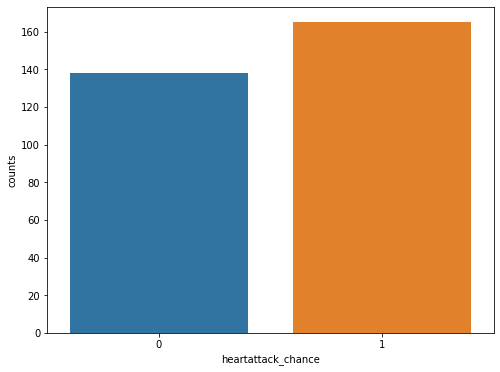

In [437]:
#visualisasi dari kolom target
print(heart_count)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="heartattack_chance", y="counts", data=heart_count)

#### Note :
1. Ubah nama _target_ menjadi _heartattack_chance_ sehingga lebih dikenali dan menjelaskan value pada target
2. terdapat 2 value, yaitu 0 = kurang potensi terjadinya heartattack, 1 = potensi terjadinya heartattack
3. lebih banyak pasien yang memiliki potensi terjadinya heartattack (165), dibandingkan yang tidak (138)

---
2. Variable Analysis

In [438]:
#cek apakah terdapat numerice atau categorical value
num_columns = heart_df.select_dtypes(include=np.number).columns.tolist()
cat_columns = heart_df.select_dtypes(include=['object']).columns.tolist()

print('num columns : ', num_columns)
print('cat columns : ', cat_columns)

num columns :  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartattack_chance']
cat columns :  []


Text(0, 0.5, 'thelach')

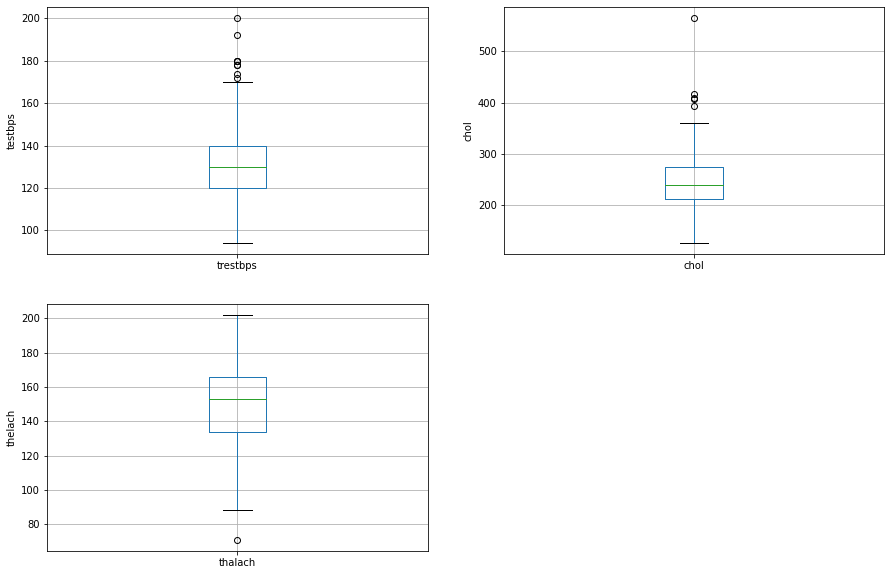

In [439]:
#cek outlier menggunakan boxplot
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = heart_df.boxplot(column='trestbps')
fig.set_title('')
fig.set_ylabel('testbps')


plt.subplot(2, 2, 2)
fig = heart_df.boxplot(column='chol')
fig.set_title('')
fig.set_ylabel('chol')


plt.subplot(2, 2, 3)
fig = heart_df.boxplot(column='thalach')
fig.set_title('')
fig.set_ylabel('thelach')


Text(0, 0.5, 'heartattack_chance')

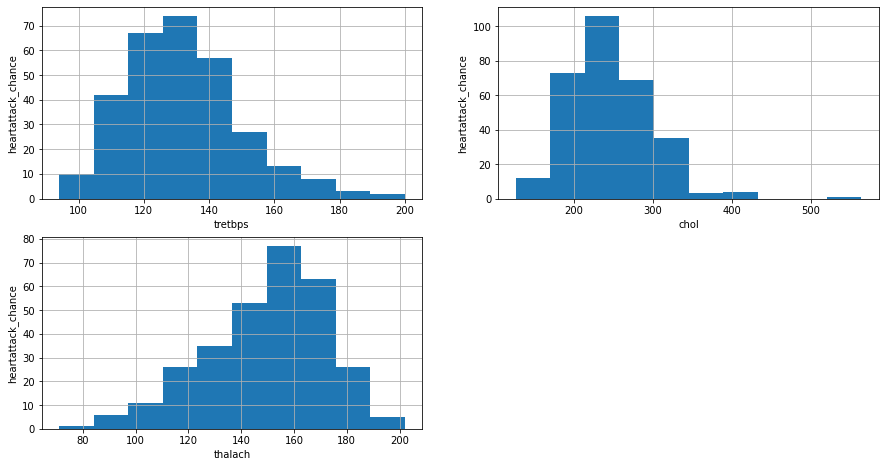

In [440]:
#cek distribusi pada dataset
plt.figure(figsize=(15,12))


plt.subplot(3, 2, 1)
fig = heart_df['trestbps'].hist(bins=10)
fig.set_xlabel('tretbps')
fig.set_ylabel('heartattack_chance')


plt.subplot(3, 2, 2)
fig = heart_df['chol'].hist(bins=10)
fig.set_xlabel('chol')
fig.set_ylabel('heartattack_chance')


plt.subplot(3, 2, 3)
fig = heart_df['thalach'].hist(bins=10)
fig.set_xlabel('thalach')
fig.set_ylabel('heartattack_chance')

<AxesSubplot:>

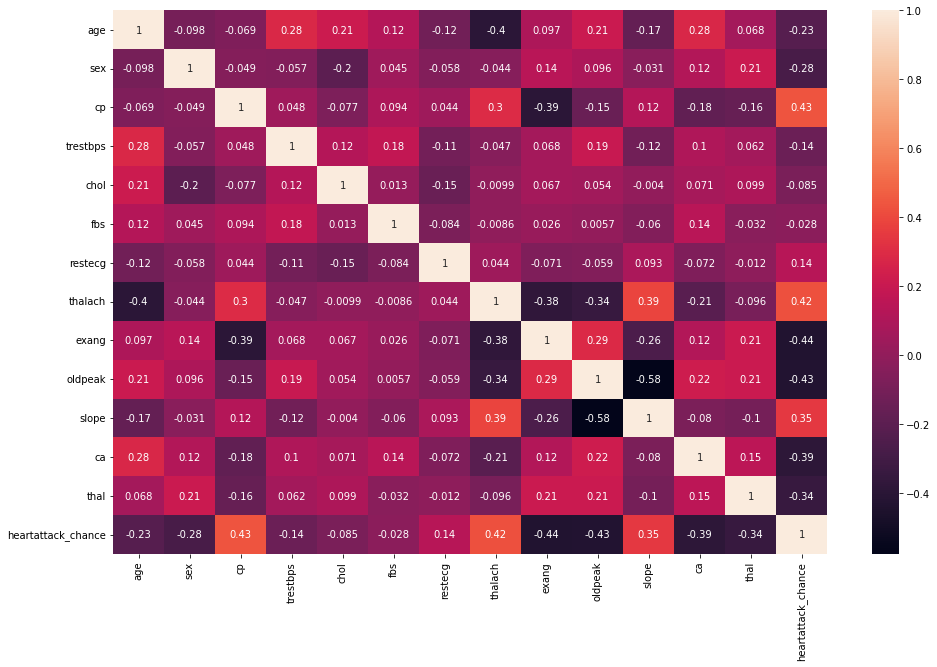

In [441]:
#cek heatmap korelasi antara feature dan target
num_corr = heart_df[num_columns]
plt.figure(figsize=(16,10))
sns.heatmap(num_corr.corr(),annot=True)

In [442]:
heart_df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [443]:
heart_df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

#### Note :
1. tidak terdapat missing value pada feature atau target
2. kolom hanya bertype numeric saja, tidak ada categorical 
3. dari visualisasi boxplot, terdapat 3 kolom yang memiliki outlier
4. sebenarnya terdapat keanehan pada kolom thal, dan ca. pada kolom thal terdapat 4 value 0 - 3 sedangkan pada deskripsi dataset hanya dijelaskan 0 - 2, dan pada kolom ca terdapat 5 value (0 - 4) sedangkan pada deskripsi dataset, hanya terdapat 4 value (0 - 3). karena minimnya pengetahuan maka peneliti tidak bisa untuk menghapus atau melihat itu sebagai outlier
5. korelasi heatmap, menjelaskan hampir semua feature mempunyai relasi dengan target, namu ada 2 kolom yang mempunyai relasi lemah terhadap kolom yaitu fbs dan col <br>
namun berdasarkan refrensi yang terlah ditemukan, bahwa kedua feature tersebut memiliki keterkaitan dengan target secara medis, sehingga tidak didrop

Ref : <br>
https://pubmed.ncbi.nlm.nih.gov/23404299/

https://www.healthline.com/health/blood-pressure-changes-during-heart-attack#is-it-a-warningsign

---
---
### Data Preprocessing

#### Step by Step   :
1.  Split Train dan test set
2.  Handling missing value
3.  Handling outlier
4.  Scalling


---
1. Spliting

In [444]:
X = heart_df.drop(columns=['heartattack_chance'], axis=1)
y = heart_df['heartattack_chance']

In [445]:
#split data X, y with parameter 20% test and 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

---
2. handling missing value

In [446]:
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

---
3. Handling outlier

In [447]:
def calc_outlier(new_df, col):

    q1 = np.quantile(new_df[col], 0.25)
    q3 = np.quantile(new_df[col], 0.75)
    iqr = q3 - q1

    #cari batas atas dan batas bawah
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    
    new_df[col] = np.where(
    new_df[col] > upper,
    upper,
    np.where(
        new_df[col] < lower,
        lower,
        new_df[col]
        )
    )

In [448]:
#cek outlier
calc_outlier(X_train, 'trestbps')
calc_outlier(X_train, 'chol')
calc_outlier(X_train, 'thalach')


In [449]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.851240,0.673554,0.966942,131.524793,245.685950,0.14876,0.520661,149.893595,0.334711,1.063223,1.409091,0.727273,2.289256
std,8.944421,0.469885,1.050065,16.355535,49.199616,0.35659,0.532732,22.962338,0.472867,1.193764,0.619530,1.030651,0.623709
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.00000,0.000000,87.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,209.250000,0.00000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,277.750000,0.00000,1.000000,166.000000,1.000000,1.750000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,170.000000,380.500000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


---
4. Feature Scalling

In [450]:
scaler = StandardScaler()
scaler.fit(X_train) 

X_train_final = scaler.transform(X_train)
X_test_final = scaler.transform(X_test)

In [451]:
X_train_final

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

In [452]:
numeric_columns = X_train.select_dtypes(include=np.number).columns.tolist()
df_num = pd.DataFrame(X_train_final, columns=numeric_columns)

In [453]:
df_num

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.327733,-1.436416,0.985842,-0.583566,-0.665731,-0.418040,0.901639,0.659241,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
1,1.249032,-1.436416,0.985842,0.886868,0.658156,-0.418040,-0.979367,0.091923,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
2,0.352766,0.696177,0.985842,0.519260,-0.706466,2.392117,-0.979367,0.659241,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
3,0.912932,-1.436416,-0.922749,-0.461030,-0.991610,-0.418040,0.901639,-0.606314,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
4,0.240733,0.696177,0.031547,1.377013,-0.278748,-0.418040,-0.979367,0.615601,-0.709299,-0.892493,0.955779,0.265165,-0.464729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-1.327733,0.696177,-0.922749,0.029115,0.026764,2.392117,-0.979367,-0.300835,1.409842,-0.808551,-0.661693,3.181981,1.141906
238,-0.095367,0.696177,-0.922749,-0.706102,-1.174918,-0.418040,0.901639,-1.610030,-0.709299,0.282698,-0.661693,0.265165,1.141906
239,0.128699,0.696177,1.940138,-0.706102,-1.073080,-0.418040,-0.979367,0.528321,-0.709299,0.702409,-0.661693,-0.707107,1.141906
240,-0.879600,0.696177,0.985842,0.396724,0.230439,-0.418040,-0.979367,0.266482,-0.709299,-0.892493,0.955779,-0.707107,-0.464729


#### Note :
1. tidak terdapat missing value, sehingga tidak perlu diproses
2. handling oitlier pada temuan sebelumnya
3. scaling data sehingga memiliki satuan yang tidak terlalu jauh satu sama lainya
4. tidak perlu dilakukan encoding, karena semua data sudah bertype numeric

---
---
### Model Definition

#### Step by step
1. definisi Decsiiontree
2. definisi randomforest
3. Predict kedua hasil
4. Evaluasi menggunakan accuracy score, confusin matric, dan clasiffication report

In [454]:
dt = DecisionTreeClassifier()


# fit the model
dt.fit(X_train_final, y_train)

DecisionTreeClassifier()

---
---
### Model Training

In [455]:
rfc = RandomForestClassifier()

rfc.fit(X_train_final, y_train)

RandomForestClassifier()

In [456]:
#predik decisiiontree
dt_pred_train = dt.predict(X_train_final)
dt_pred_test = dt.predict(X_test_final)

In [457]:
#predik randomforest
rfc_pred_train = rfc.predict(X_train_final)
rfc_pred_test = rfc.predict(X_test_final)

---
---
### Model Evaluation

1. DecisionTree

In [458]:
#print acc pada decision tree
print('accuracy score training - set: {}'. format(accuracy_score(y_train, dt_pred_train)))

print('accuracy score test - set : {} '. format(accuracy_score(y_test, dt_pred_test)))

accuracy score training - set: 1.0
accuracy score test - set : 0.7540983606557377 


In [459]:
#print conf matrixnya
print('confusion matrix test set')
print(confusion_matrix(y_test, dt_pred_test))

confusion matrix test set
[[21  6]
 [ 9 25]]


In [460]:
#print clsification report
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.81      0.74      0.77        34

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



2. RandomForest

In [461]:
#print acc pada random forest
print('accuracy score training - set: {}'. format(accuracy_score(y_train, rfc_pred_train)))

print('accuracy score test - set : {} '. format(accuracy_score(y_test, rfc_pred_test)))

accuracy score training - set: 1.0
accuracy score test - set : 0.8032786885245902 


In [462]:
print('confusion matrix test set')
print(confusion_matrix(y_test, rfc_pred_test))

confusion matrix test set
[[22  5]
 [ 7 27]]


In [463]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



- DecisionTree
1.  Training set akurasi yaitu 1, sedangkan pada test set yaitu 0.78
2.  Precision mengidentifikasi proporsi hasil positif yang diprediksi dengan benar, dengan skore 73% pada tidak terdapat potensi serangan jantung dan 84% pada terdapat potensi serangan jantung
3.  Recall mengidentifikasi proporsi positif aktual yang diprediksi dengan benar, dengan skore 81% pada tidak terdapat potensi serangan jantung dan 76% pada terdapat potensi serangan jantung
4.  f1-score adalah rata-rata dari Precision dan Recall
5.  Support adalah jumlah aktual kemunculan kelas dalam dataset, yatu 27 pada tidak terdapat potensi serangan jantung dan 34 pada terdapat potensi serangan jantung

-  Random Forest
1.  Training set akurasi yaitu 1, sedangkan pada test set yaitu 0.83
2.  Precision mengidentifikasi proporsi hasil positif yang diprediksi dengan benar, dengan skore 81% pada tidak terdapat potensi serangan jantung dan 85% pada terdapat potensi serangan jantung
3.  Recall mengidentifikasi proporsi positif aktual yang diprediksi dengan benar, dengan skore 81% pada tidak terdapat potensi serangan jantung dan 85% pada terdapat potensi serangan jantung
4.  Support adalah jumlah aktual kemunculan kelas dalam dataset, yatu 27 pada tidak terdapat potensi serangan jantung dan 34 pada terdapat potensi serangan jantung

Kesimpulanya :

kedua model mengalamu underfitting pada train set, sehingga perlu dituning menggunakan hyperparameter yang tepat

---
3. Tuning hyperparameter

In [464]:
model = RandomForestClassifier()
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_final, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.823444 using {'max_features': 'sqrt', 'n_estimators': 100}
0.783222 (0.075890) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.823444 (0.064400) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.790222 (0.084240) with: {'max_features': 'log2', 'n_estimators': 10}
0.823389 (0.073953) with: {'max_features': 'log2', 'n_estimators': 100}


In [465]:
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
max_depth = [1, 100]
# define grid search
grid = dict(criterion=criterion,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_final, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.750500 using {'criterion': 'entropy', 'max_depth': 100}
0.701111 (0.085622) with: {'criterion': 'gini', 'max_depth': 1}
0.736833 (0.102234) with: {'criterion': 'gini', 'max_depth': 100}
0.701111 (0.085622) with: {'criterion': 'entropy', 'max_depth': 1}
0.750500 (0.076098) with: {'criterion': 'entropy', 'max_depth': 100}


In [466]:
dtgini = DecisionTreeClassifier(criterion="gini", max_depth=1)


# fit the model
dtgini.fit(X_train_final, y_train)

DecisionTreeClassifier(max_depth=1)

In [467]:
dtgini_pred_train = dtgini.predict(X_train_final)
dtgini_pred_test = dtgini.predict(X_test_final)

In [468]:
print('accuracy score training - set: {}'. format(accuracy_score(y_train, dtgini_pred_train)))

print('accuracy score test - set : {} '. format(accuracy_score(y_test, dtgini_pred_test)))

accuracy score training - set: 0.7520661157024794
accuracy score test - set : 0.7868852459016393 


In [469]:
rfc100 = RandomForestClassifier(max_features='sqrt', n_estimators=100)


# fit the model
rfc100.fit(X_train_final, y_train)

RandomForestClassifier()

In [470]:
rfc100_pred_train = rfc100.predict(X_train_final)
rfc100_pred_test = rfc100.predict(X_test_final)

In [471]:
print('accuracy score training - set: {}'. format(accuracy_score(y_train, rfc100_pred_train)))

print('accuracy score test - set : {} '. format(accuracy_score(y_test, rfc100_pred_test)))

accuracy score training - set: 1.0
accuracy score test - set : 0.8524590163934426 


### Note : 
1. setelah dilakukang tuning hyperparameter menggunakan gridsearchcv, dapat disimpulkan bahwa pada model menggunakan decision tree terdapat perubahan yang signifikan, dan antara akurasu train set dengan test setnya tidak terlalu jauh, sehingga sangat kecil terdapat underfitting
2. pada model random forest, setelah dilakukan tuning, masih terdapat perbedaan, sehingga masih bersifat underfitting

Kesimpulan :
- model terlalu sederhana dan random forest classifier tidak cocok digunakan dalam model ini

---
---
### Model Inference

In [472]:
data_inf = heart_df.sample(10, random_state=0)

In [473]:
data_inf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartattack_chance
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0


In [474]:
data_inf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartattack_chance
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.0,10.000000
mean,58.500000,0.900000,0.800000,143.400000,249.100000,0.200000,0.200000,141.800000,0.500000,1.77000,0.900000,1.000000,3.0,0.200000
std,8.669871,0.316228,1.316561,27.869537,51.089138,0.421637,0.421637,16.088643,0.527046,1.17194,0.567646,1.247219,0.0,0.421637
min,40.000000,0.000000,0.000000,110.000000,167.000000,0.000000,0.000000,114.000000,0.000000,0.20000,0.000000,0.000000,3.0,0.000000
25%,56.750000,1.000000,0.000000,126.250000,228.000000,0.000000,0.000000,132.250000,0.000000,0.80000,1.000000,0.000000,3.0,0.000000
50%,61.000000,1.000000,0.000000,130.000000,256.000000,0.000000,0.000000,143.500000,0.500000,1.80000,1.000000,0.500000,3.0,0.000000
75%,63.000000,1.000000,1.500000,163.750000,284.500000,0.000000,0.000000,153.000000,1.000000,2.45000,1.000000,1.750000,3.0,0.000000
max,70.000000,1.000000,3.000000,200.000000,330.000000,1.000000,1.000000,166.000000,1.000000,4.00000,2.000000,3.000000,3.0,1.000000


In [475]:
data_inf.isnull().sum()

age                   0
sex                   0
cp                    0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalach               0
exang                 0
oldpeak               0
slope                 0
ca                    0
thal                  0
heartattack_chance    0
dtype: int64

In [476]:
data_inf_test = data_inf.copy()

In [477]:
#drop target to use as model inference
data_inf.drop(columns=['heartattack_chance'], axis=1, inplace=True)

Text(0, 0.5, 'thelach')

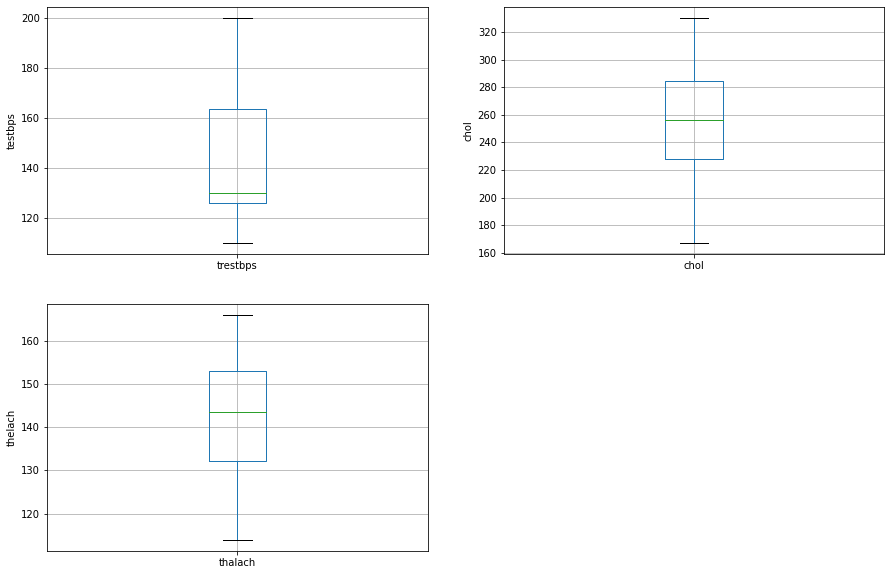

In [478]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data_inf.boxplot(column='trestbps')
fig.set_title('')
fig.set_ylabel('testbps')


plt.subplot(2, 2, 2)
fig = data_inf.boxplot(column='chol')
fig.set_title('')
fig.set_ylabel('chol')


plt.subplot(2, 2, 3)
fig = data_inf.boxplot(column='thalach')
fig.set_title('')
fig.set_ylabel('thelach')

In [479]:
data_inf_scaled = scaler.transform(data_inf)

In [480]:
pd.DataFrame(data_inf_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.697165,0.696177,-0.922749,0.825600,-1.460063,-0.418040,0.901639,-1.086352,1.409842,1.290005,-2.279165,-0.707107,1.141906
1,1.024965,0.696177,1.940138,2.357303,-0.380586,-0.418040,-0.979367,0.222843,-0.709299,-0.388840,-0.661693,-0.707107,1.141906
2,0.464799,0.696177,1.940138,2.357303,0.861831,-0.418040,-0.979367,0.397402,-0.709299,-0.724609,-0.661693,-0.707107,1.141906
3,0.576832,0.696177,-0.922749,-0.399762,0.250806,-0.418040,-0.979367,-0.388115,1.409842,1.457889,-0.661693,0.265165,1.141906
4,0.800899,0.696177,0.985842,-0.093421,-0.299116,-0.418040,0.901639,-0.169916,-0.709299,0.618467,-0.661693,2.209709,1.141906
5,-0.767567,0.696177,-0.922749,-0.461030,0.576686,-0.418040,-0.979367,0.702881,-0.709299,-0.472782,-0.661693,-0.707107,1.141906
6,-1.663833,0.696177,-0.922749,-1.318783,-1.602635,-0.418040,-0.979367,-1.566390,1.409842,0.786351,-0.661693,-0.707107,1.141906
7,0.912932,0.696177,-0.922749,-0.093421,0.169336,-0.418040,-0.979367,-0.126276,-0.709299,0.282698,-0.661693,0.265165,1.141906
8,0.128699,-1.436416,-0.922749,4.195346,0.861831,2.392117,-0.979367,-0.737234,1.409842,2.465196,-2.279165,1.237437,1.141906
9,0.912932,0.696177,-0.922749,-0.093421,1.717265,2.392117,-0.979367,-0.780873,1.409842,0.618467,0.955779,2.209709,1.141906


In [481]:
y_pred_inf = rfc.predict(data_inf)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['heartattack_chance - Inference'])
y_pred_inf_df

C:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,heartattack_chance - Inference
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [483]:
y_pred_inf_dt = dt.predict(data_inf)
y_pred_inf_df_dt = pd.DataFrame(y_pred_inf, columns=['heartattack_chance - Inference'])
y_pred_inf_df_dt

C:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,heartattack_chance - Inference
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [482]:
data_inf_test['heartattack_chance']

225    0
152    1
228    0
201    0
52     1
245    0
175    0
168    0
223    0
217    0
Name: heartattack_chance, dtype: int64

#### Note   :
1.  Berdasarkan hasil dari prediksi menggunakan Data Inference pada kedua model, random forest ataupun Decision Tree perbandingan antara dataset asli dengan prediksi adalah dari 10 sampel didapat 8 prediksi tepat, sedangkan 2 buah prediksi salah
sehingga dapat disimpulkan model memiliki akurasi 80%

---
---
### Kesimpulan 

1. sebelum dituning hyperparamter kedua model underfiting
2. setelah dituning hyperparamerter model Decision Tree tidak undefitinf lagi, sedangkan random forest masih
3. pada model ini lebih disarankan menggunakan decision tree karena, random forest tidak cocok untuk dataset yang sederhana sedangkan decision tree lebih cocok